# TP à rendre 2 Egalisation d'histogrammes
Dans ce TP, nous aimerions améliorer le contraste d'images par deux méthodes. Une méthode d'expansion de la dynamique, et une méthode d'égalisaton d'histogramme. La première image à traiter est dans un fichier npy à loader. Le reste des images sont dans le même dossier. 

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Lire et afficher l'image à utiliser

In [23]:
# 64 size image
image = np.genfromtxt('image.csv', delimiter=';')
imageBase = image

In [24]:
# grain image
image = cv2.imread("Fig0208(a).tif", cv2.IMREAD_GRAYSCALE)
imageBase = cv2.imread("Fig0208(a).tif", cv2.IMREAD_COLOR)

In [25]:
# Einstein image
image = cv2.imread("Fig0228(a).tif", cv2.IMREAD_GRAYSCALE)
imageBase = cv2.imread("Fig0228(a).tif", cv2.IMREAD_COLOR)

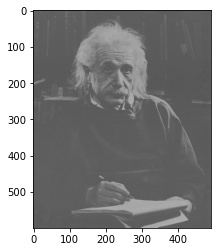

In [26]:
plt.imshow(imageBase)

# Calculer les métriques sur l'image
1.	Calculer la moyenne de luminance de l’image.
2.	Donner la dynamique de l’image (intervalle [Lmin, Lmax]).
3.	Calculer le contraste de l’image.
4.	Calculer l’écart type des niveaux de gris de l’image.


In [27]:
# Moyenne de luminance
luminanceMean = image.mean()
luminanceMean

102.35628571428572

In [28]:
# Image Dynamic
Lmin = image.min()
Lmax = image.max()

Lmin, Lmax

(74, 178)

In [29]:
# Image Contrast
contrast = (Lmax - Lmin) / (Lmax + Lmin)
contrast

0.41269842

In [30]:
# Ecart type


# Histogramme et histogramme cumulé
5.	Construire l’histogramme de cette image ainsi que son histogramme normalisé.
6.	Construire l’histogramme cumulé de cette image ainsi que son histogramme cumulé normalisé.

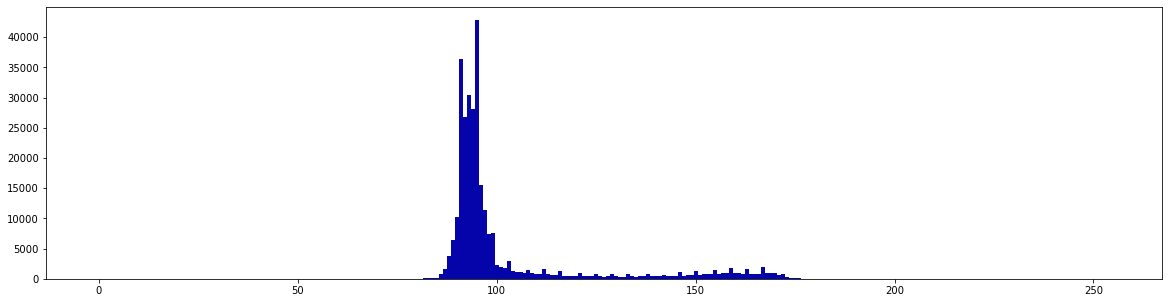

In [31]:
# Histogram
hist, edges = np.histogram(image, bins=range(256))
histogram = { edges[i]:hist[i] for i in range(len(hist))}

plt.figure(figsize=[20,5])
plt.bar(edges[:-1], list(histogram.values()), width = 1, color='#0504aa')
plt.show()

In [32]:
w, h = image.shape
imageSize = w * h

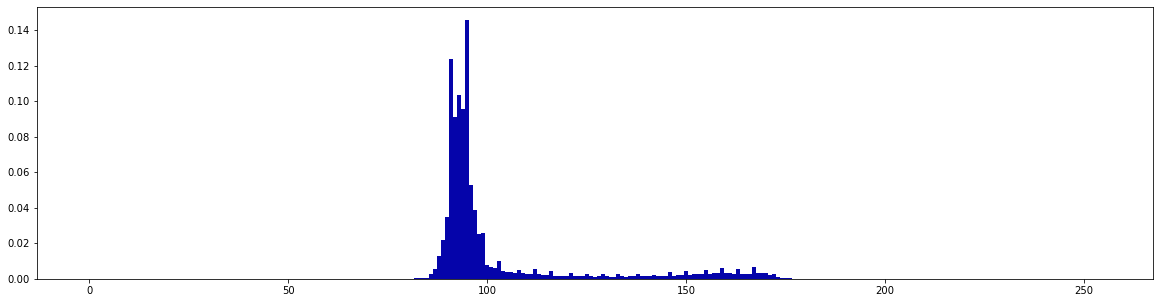

In [33]:
# Normalized Histogram
histogramN = {}
for key, val in histogram.items():
    histogramN[key] = val/imageSize


plt.figure(figsize=[20,5])
plt.bar(edges[:-1], list(histogramN.values()), width = 1, color='#0504aa')
plt.show()

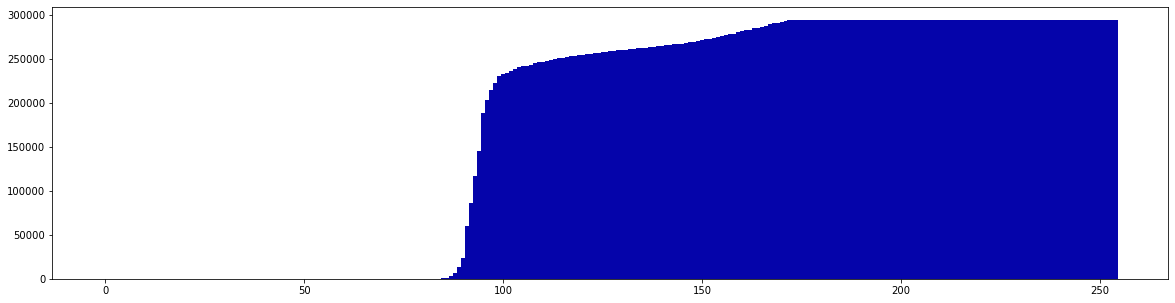

In [34]:
# Cumulated Histogram
cummule = 0
histogramCummule = {}
for key, val in histogram.items():
    cummule += val
    histogramCummule[key] = cummule

plt.figure(figsize=[20,5])
plt.bar(edges[:-1], list(histogramCummule.values()), width = 1, color='#0504aa')
plt.show()

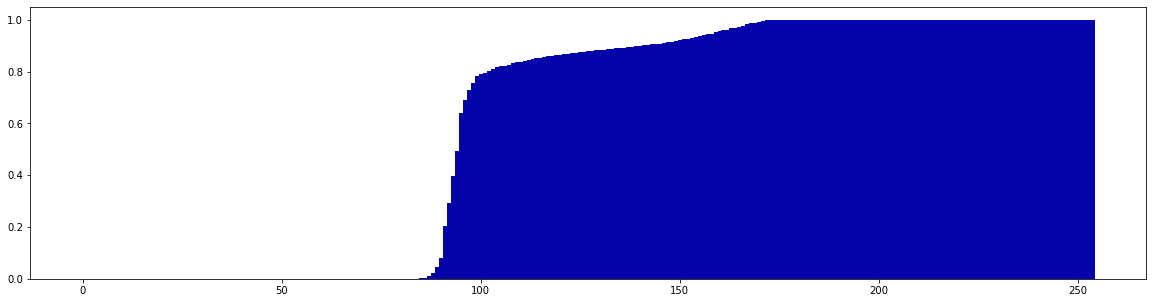

In [35]:
# Cumulated Normalized Histogram
histogramCummuleN = { key:val/imageSize for key, val in histogramCummule.items()}

plt.figure(figsize=[20,5])
plt.bar(edges[:-1], list(histogramCummuleN.values()), width = 1, color='#0504aa')
plt.show()

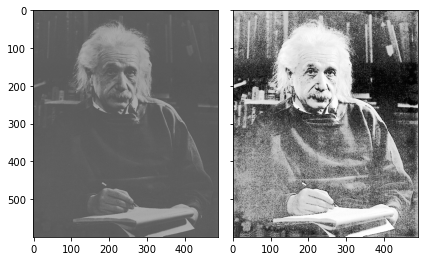

In [36]:
egalisationImage = image.copy()
for i, row in enumerate(egalisationImage):
    for j, pixel in enumerate(row):
        egalisationImage[i][j] = np.floor(histogramCummuleN[pixel] * 255)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].imshow(imageBase)
axs[1].imshow(egalisationImage,cmap='gray')

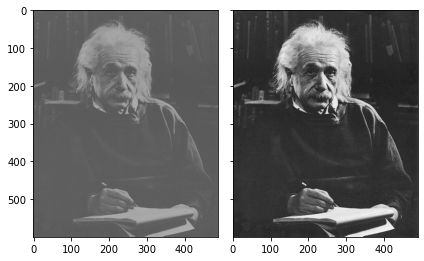

In [37]:
etirementImage = image.copy()
for i, row in enumerate(etirementImage):
    for j, pixel in enumerate(row):
        etirementImage[i][j] = np.floor(((pixel - Lmin) * 255)/(Lmax - Lmin))

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].imshow(imageBase)
axs[1].imshow(etirementImage,cmap='gray')

# Comparer votre implémentation aux fonctions de opencv

(0.0, 256.0)

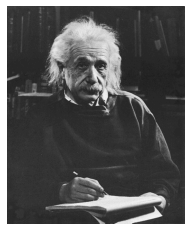

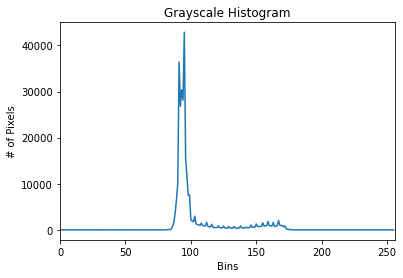

In [38]:
#cv2.calcHist
cv2hist = cv2.calcHist([image], [0], None, [256], [0, 256])
# matplotlib expects RGB images so convert and then display the image
# with matplotlib
plt.figure()
plt.axis("off")
plt.imshow(image, cmap='gray')
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(cv2hist)
plt.xlim([0, 256])

- Expliquer la difference.
- comparer aussi avec les méthodes des autres librairies.

# 7.	Etendre l’histogramme et visualiser l’image résultante.

In [ ]:
etirementCV2 = image.copy()
for i, row in enumerate(etirementCV2):
    for j, pixel in enumerate(row):
        etirementImage[i][j] = np.floor(((pixel - Lmin) * 255)/(Lmax - Lmin))

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].imshow(imageBase)
axs[1].imshow(etirementImage,cmap='gray')

# 8.	Comparer les histogrammes des deux images ; originale et étendue

# Expansion de la dynamique et comparaison avec l'égalisation d'histogramme

# Améliorer le contraste des images données
améliorer le contraste des 3 images envoyées avec les méthodes implémentées precedemment.

# Consignes
Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi à 19h


In [ ]:
# bonne chance